## Observed SST and Chlorophylla

In [1]:
from ocean_tools.io.readers import get_xarray_from_file
from ocean_tools.config.defaults import REGIONS
from ocean_tools.processing.data_prep import prepare_dataset_for_analysis, time_aggregator
from ocean_tools.visualization.maps import plot_spatial_variable, plot_n_spatial_variable

REGION = REGIONS['cclme']
DATASETS = {
    'sst': "./data/exports/AQUA_MODIS_MONTHLY.2002-08-01_2024-11-01.nc",
    'chlor_a': "./data/exports/AQUA_MODIS_MONTHLY_CHLOR.2002-08-01_2024-11-01.nc"
}

### Load Data

In [2]:
ds_sst_raw = get_xarray_from_file(DATASETS['sst']).sel(
    time=slice('2002-08-01', '2024-07-01'), 
    lat=slice(REGION['lat'][1], REGION ['lat'][0]),
    lon=slice(REGION['lon'][0], REGION ['lon'][1])
)
ds_chlor_raw = get_xarray_from_file(DATASETS['chlor_a']).sel(
    time=slice('2002-08-01', '2024-07-01'), 
    lat=slice(REGION['lat'][1], REGION ['lat'][0]),
    lon=slice(REGION['lon'][0], REGION ['lon'][1])
)

ds_sst = prepare_dataset_for_analysis(ds_sst_raw.copy(), 'sst', use_anomalies=False)
ds_sst_anom = prepare_dataset_for_analysis(ds_sst_raw.copy(), 'sst', use_anomalies=True)
ds_sst_anom_pos = prepare_dataset_for_analysis(ds_sst_raw.copy(), 'sst', use_anomalies=True, anomaly_transform='positive')
ds_sst_anom_neg = prepare_dataset_for_analysis(ds_sst_raw.copy(), 'sst', use_anomalies=True, anomaly_transform='negative')
ds_sst_anom_abs = prepare_dataset_for_analysis(ds_sst_raw.copy(), 'sst', use_anomalies=True, anomaly_transform='abs')
ds_sst_anom_sqrd = prepare_dataset_for_analysis(ds_sst_raw.copy(), 'sst', use_anomalies=True, anomaly_transform='square')

ds_chlor = prepare_dataset_for_analysis(ds_chlor_raw.copy(), 'chlor_a', use_anomalies=False)
ds_chlor_anom = prepare_dataset_for_analysis(ds_chlor_raw.copy(), 'chlor_a', use_anomalies=True)
ds_chlor_anom_pos = prepare_dataset_for_analysis(ds_chlor_raw.copy(), 'chlor_a', use_anomalies=True, anomaly_transform='positive')
ds_chlor_anom_neg = prepare_dataset_for_analysis(ds_chlor_raw.copy(), 'chlor_a', use_anomalies=True, anomaly_transform='negative')
ds_chlor_anom_abs = prepare_dataset_for_analysis(ds_chlor_raw.copy(), 'chlor_a', use_anomalies=True, anomaly_transform='abs')
ds_chlor_anom_sqrd = prepare_dataset_for_analysis(ds_chlor_raw.copy(), 'chlor_a', use_anomalies=True, anomaly_transform='square')

### Visualize Variables

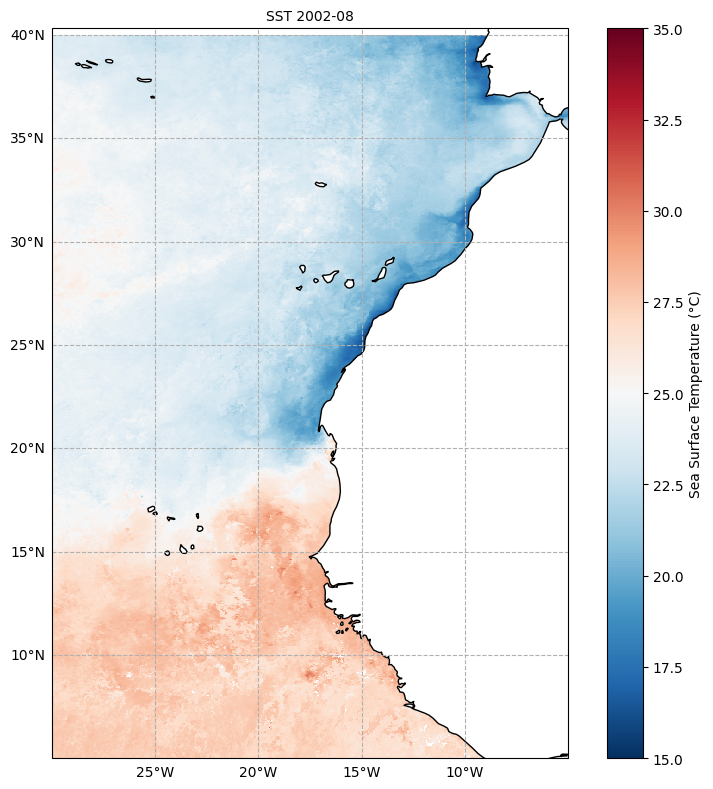

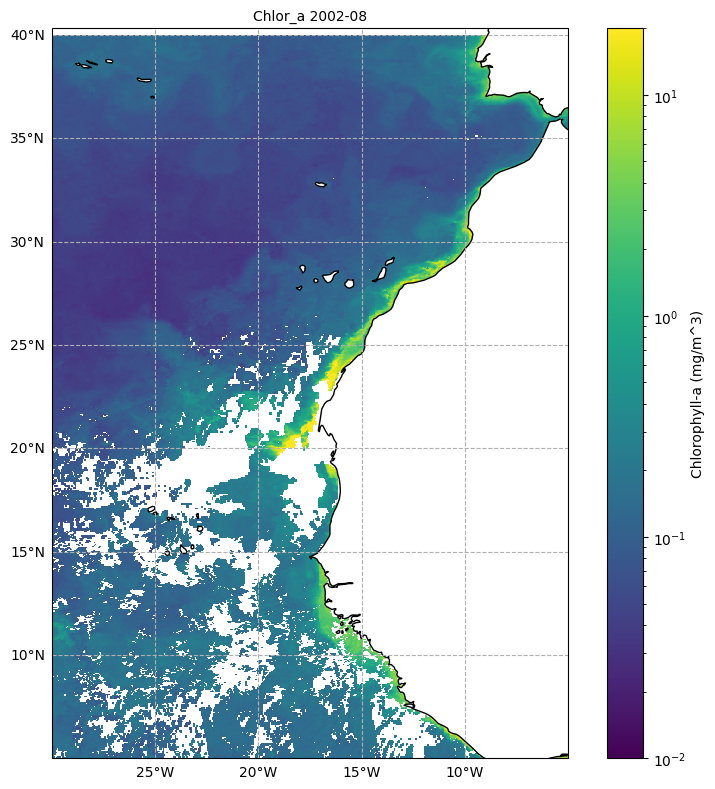

In [12]:
ds_sst_month = ds_sst.sel(time='2002-08-01')['sst']
plot_n_spatial_variable(
    [ds_sst_month],
    ds_sst.lat,
    ds_sst.lon,
    nrows = 1,
    ncols = 1,
    i_width = 8,
    i_height = 8,
    clim=[15, 35], 
    titles = ['SST 2002-08'],
    plot_label = 'Sea Surface Temperature (°C)',
    cmap = 'RdBu_r',
    norm_mode = 'none'
)

ds_chlor_month = ds_chlor.sel(time='2002-08-01')['chlor_a']
plot_n_spatial_variable(
    [ds_chlor_month],
    ds_chlor.lat,
    ds_chlor.lon,
    nrows = 1,
    ncols = 1,
    i_width = 8,
    i_height = 8,
    clim=[0.01, 20], 
    titles = ['Chlor_a 2002-08'],
    plot_label = 'Chlorophyll-a (mg/m^3)', 
    cmap = 'viridis',
    norm_mode = 'log'
)

 ### Visualize Anomalies

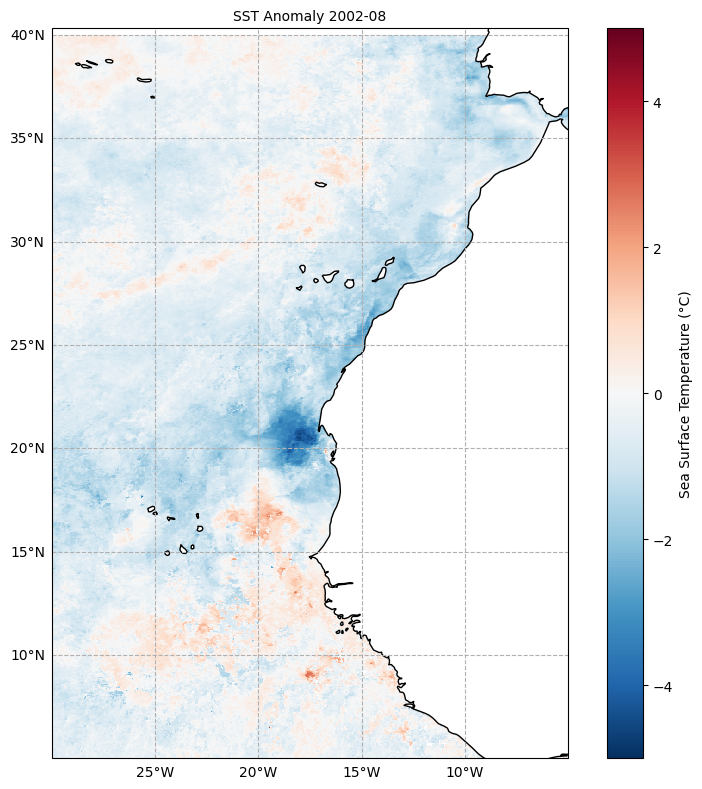

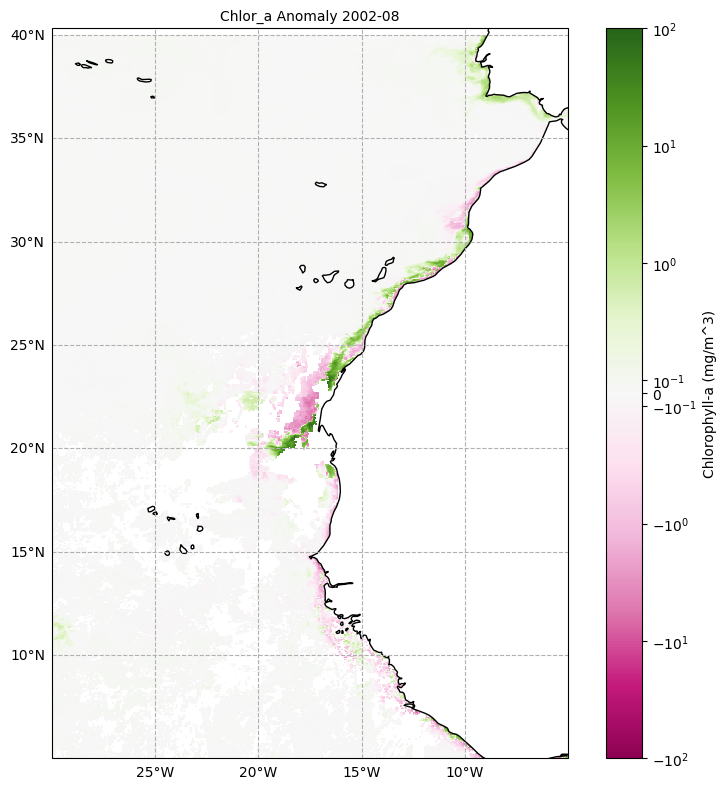

In [15]:
ds_sst_anom_month = ds_sst_anom.sel(time='2002-08-01')['sst']
plot_n_spatial_variable(
    [ds_sst_anom_month],
    ds_sst_anom.lat,
    ds_sst_anom.lon,
    nrows = 1,
    ncols = 1,
    i_width = 8,
    i_height = 8,
    clim=[-5, 5], 
    titles = ['SST Anomaly 2002-08'],
    plot_label = 'Sea Surface Temperature (°C)',
    cmap = 'RdBu_r',
    norm_mode = 'none'
)

ds_chlor_anom_month = ds_chlor_anom.sel(time='2002-08-01')['chlor_a']
plot_n_spatial_variable(
    [ds_chlor_anom_month],
    ds_chlor_anom.lat,
    ds_chlor_anom.lon,
    nrows = 1,
    ncols = 1,
    i_width = 8,
    i_height = 8,
    clim=[-100, 100], 
    titles = ['Chlor_a Anomaly 2002-08'],
    plot_label = 'Chlorophyll-a (mg/m^3)', 
    cmap = 'PiYG',
    norm_mode = 'symlog'
)

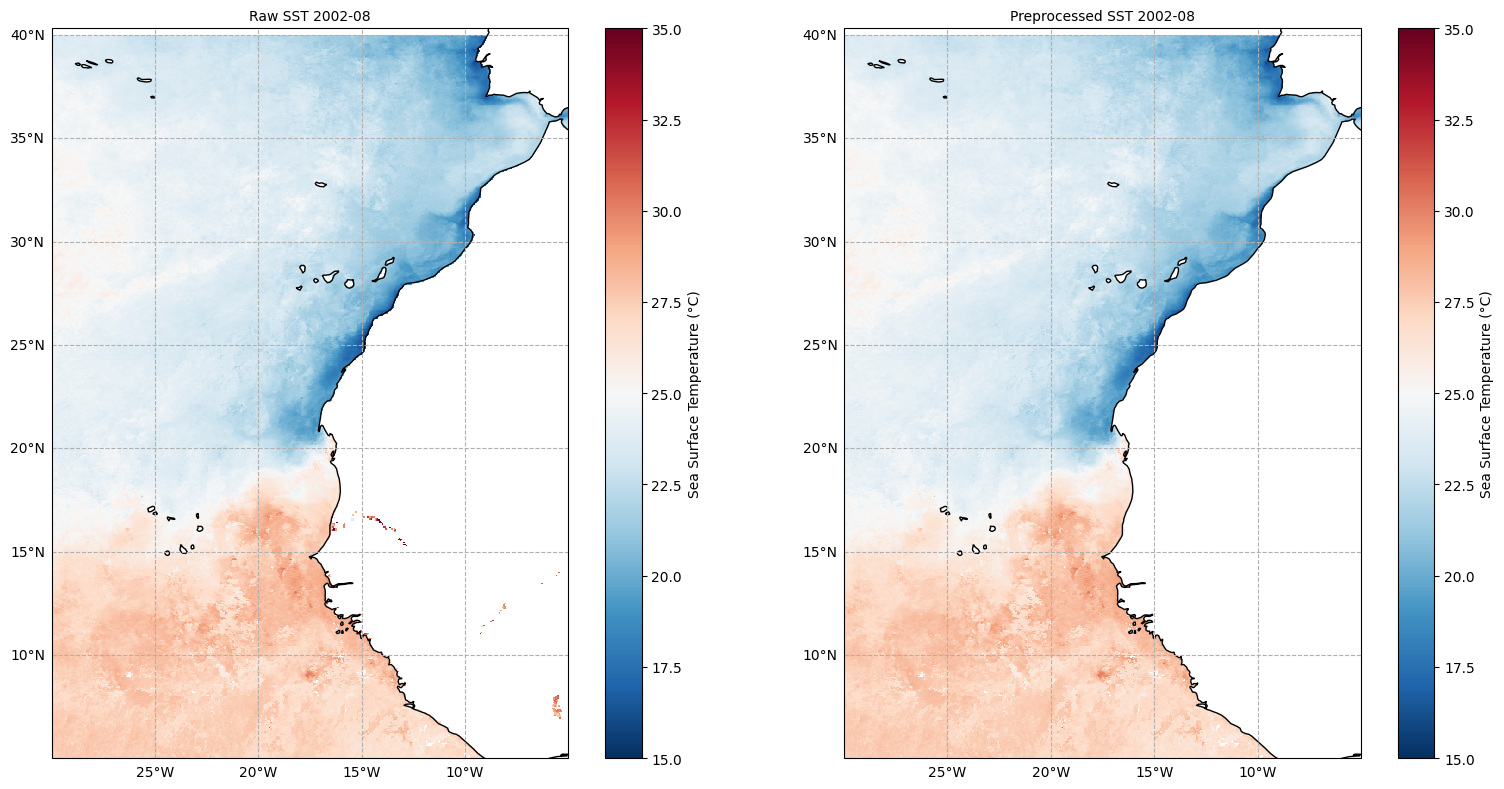

In [3]:
ds_sst_month = ds_sst.sel(time='2002-08-01')['sst']
ds_sst_month_raw = ds_sst_raw.sel(time='2002-08-01')['sst']
plot_n_spatial_variable(
    [ds_sst_month_raw, ds_sst_month],
    ds_sst.lat,
    ds_sst.lon,
    nrows = 1,
    ncols = 2,
    i_width = 8,
    i_height = 8,
    clim=[15, 35], 
    titles = ['Raw SST 2002-08', 'Preprocessed SST 2002-08'],
    plot_label = 'Sea Surface Temperature (°C)',
    cmap = 'RdBu_r',
    norm_mode = 'none'
)

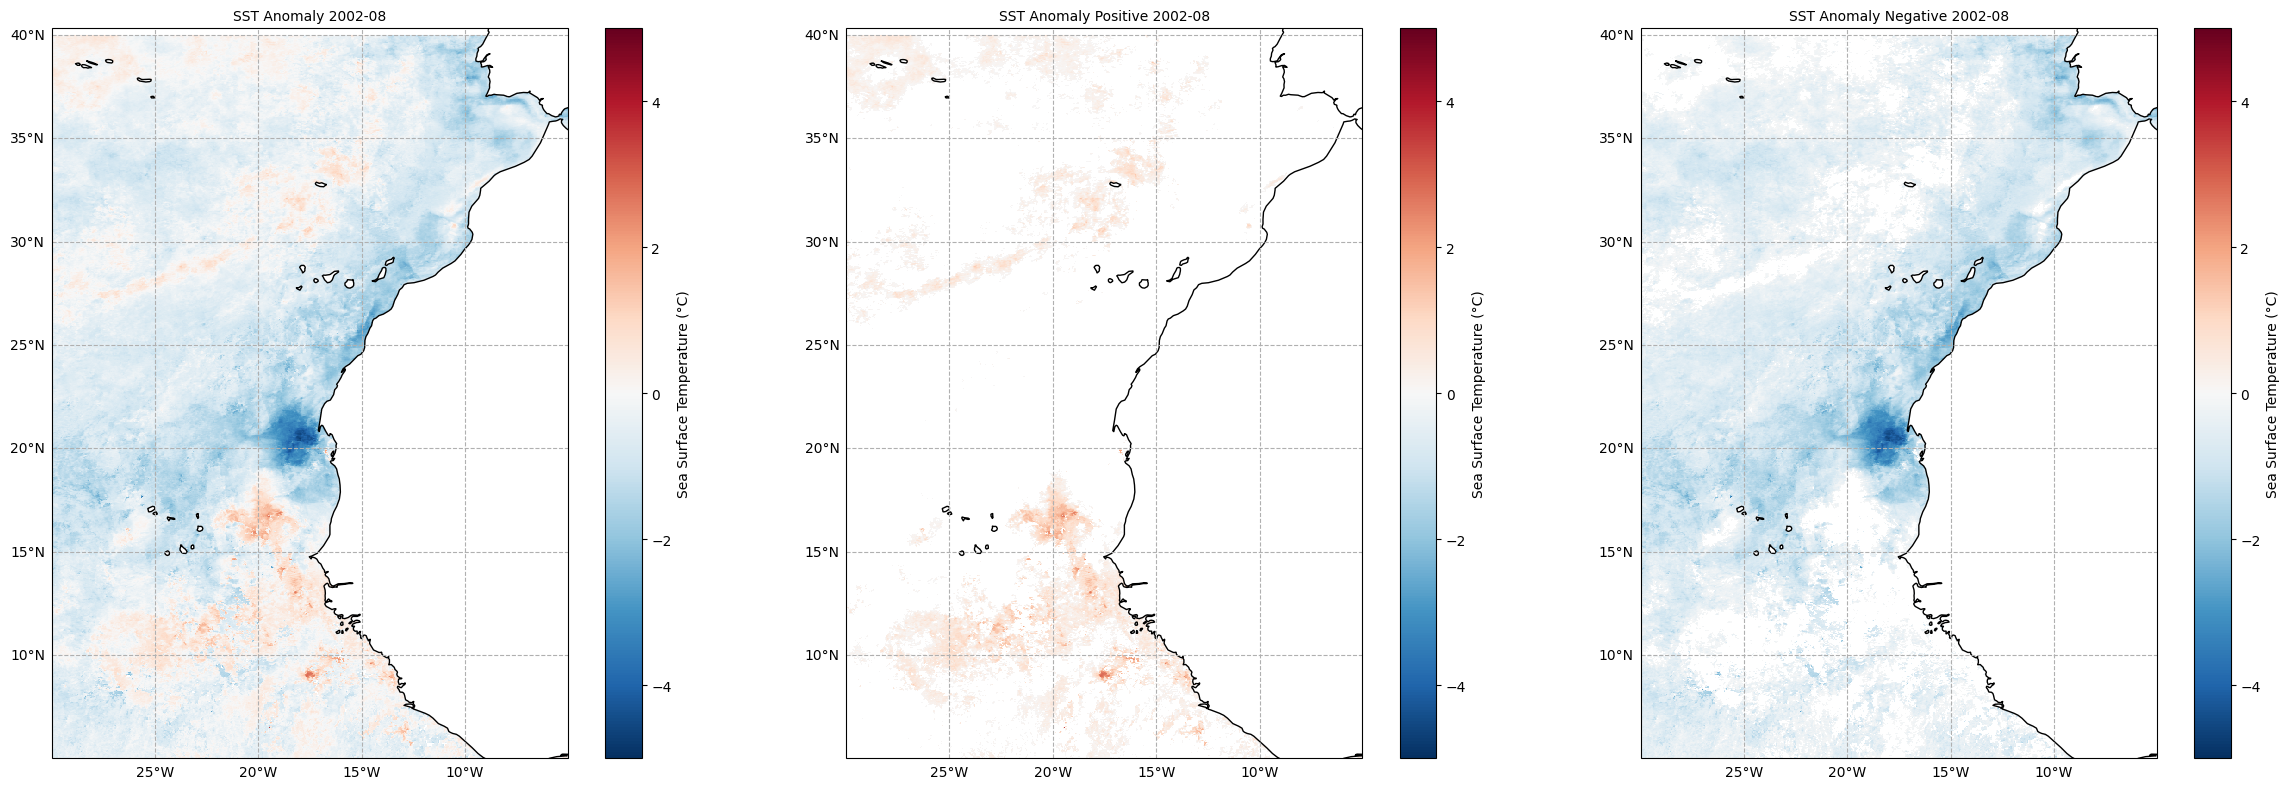

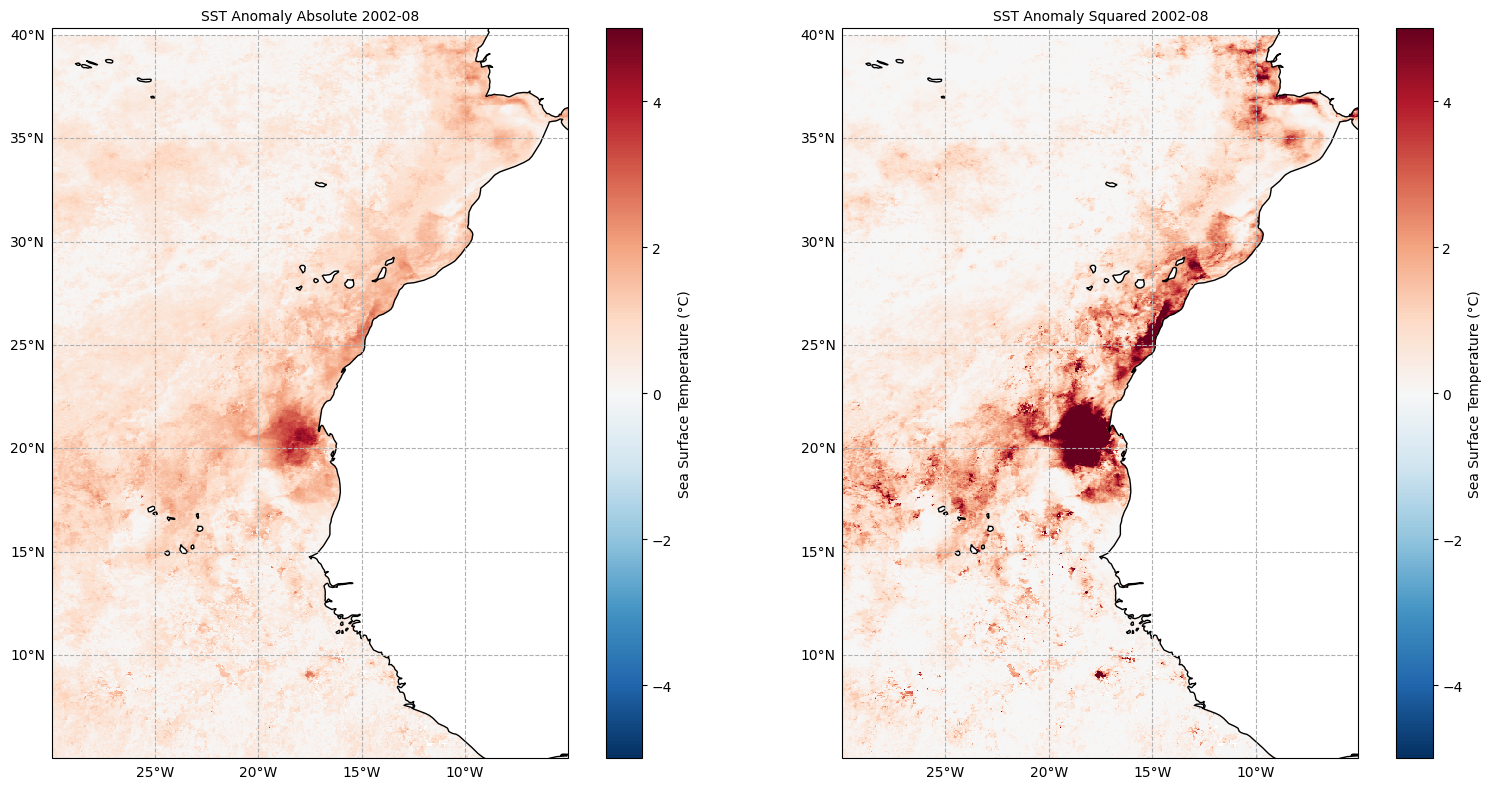

In [5]:
ds_sst_anom_month = ds_sst_anom.sel(time='2002-08-01')['sst']
ds_sst_anom_pos_month = ds_sst_anom_pos.sel(time='2002-08-01')['sst']
ds_sst_anom_neg_month = ds_sst_anom_neg.sel(time='2002-08-01')['sst']
ds_sst_anom_abs_month = ds_sst_anom_abs.sel(time='2002-08-01')['sst']
ds_sst_anom_sqrd_month = ds_sst_anom_sqrd.sel(time='2002-08-01')['sst']
plot_n_spatial_variable(
    [ds_sst_anom_month, ds_sst_anom_pos_month, ds_sst_anom_neg_month],
    ds_sst_anom.lat,
    ds_sst_anom.lon,
    nrows = 1,
    ncols = 3,
    i_width = 8,
    i_height = 8,
    clim=[-5, 5], 
    titles = ['SST Anomaly 2002-08', 'SST Anomaly Positive 2002-08', 'SST Anomaly Negative 2002-08', 'SST Anomaly Absolute 2002-08'],
    plot_label = 'Sea Surface Temperature (°C)',
    cmap = 'RdBu_r',
    norm_mode = 'none'
)
plot_n_spatial_variable(
    [ds_sst_anom_abs_month, ds_sst_anom_sqrd_month],
    ds_sst_anom.lat,
    ds_sst_anom.lon,
    nrows = 1,
    ncols = 2,
    i_width = 8,
    i_height = 8,
    clim=[-5, 5], 
    titles = ['SST Anomaly Absolute 2002-08', 'SST Anomaly Squared 2002-08'],
    plot_label = 'Sea Surface Temperature (°C)',
    cmap = 'RdBu_r',
    norm_mode = 'none'
)

In [6]:
print(ds_sst)

<xarray.Dataset> Size: 526MB
Dimensions:  (time: 261, lat: 840, lon: 600)
Coordinates:
  * lat      (lat) float32 3kB 39.98 39.94 39.9 39.85 ... 5.104 5.062 5.021
  * lon      (lon) float32 2kB -29.98 -29.94 -29.9 ... -5.104 -5.062 -5.021
  * time     (time) datetime64[ns] 2kB 2002-08-01 2002-09-01 ... 2024-07-01
Data variables:
    sst      (time, lat, lon) float32 526MB 23.41 23.45 23.45 ... 25.73 25.78
Attributes: (12/61)
    product_name:                     AQUA_MODIS_MONTHLY.2002-08-01_2024-11-01
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   25-day
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              

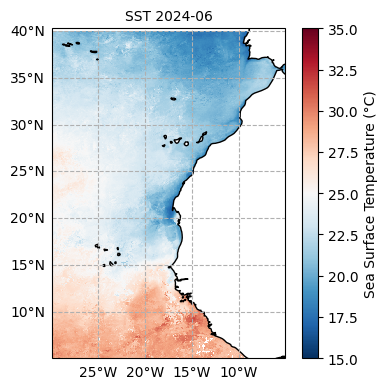

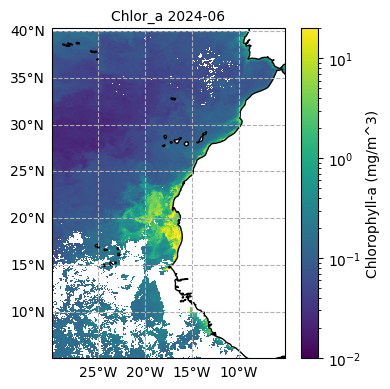

In [6]:
ds_sst_month = ds_sst.sel(time='2024-06-01')['sst']
plot_n_spatial_variable(
    [ds_sst_month],
    ds_sst.lat,
    ds_sst.lon,
    nrows = 1,
    ncols = 1,
    i_width = 4,
    i_height = 4,
    clim=[15, 35], 
    titles = ['SST 2024-06'],
    plot_label = 'Sea Surface Temperature (°C)',
    cmap = 'RdBu_r',
    norm_mode = 'none'
)

ds_chlor_month = ds_chlor.sel(time='2024-06-01')['chlor_a']
plot_n_spatial_variable(
    [ds_chlor_month],
    ds_chlor.lat,
    ds_chlor.lon,
    nrows = 1,
    ncols = 1,
    i_width = 4,
    i_height = 4,
    clim=[0.01, 20], 
    titles = ['Chlor_a 2024-06'],
    plot_label = 'Chlorophyll-a (mg/m^3)', 
    cmap = 'viridis',
    norm_mode = 'log'
)